# COMP0114 Inverse Problems in Imaging. Coursework 1
## 1. Solving Underdetermined Problems
a) Write a function of two variables, x and p, to compute the value of Φ as given above.

In [1]:
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt

In [4]:
def phi(x2,p):
    """
    Inputs:
        x2 is one element of a vector of length 2 (x1,x2)
        p is a scalar
    Returns:
        phi    
    """
    Sum = (np.abs(5-2*x2))**p + (np.abs(x2))**p
    
    return Sum

b)Use library functions to compute solutions of the above optimization problem

In [44]:
p_list = np.arange(1,4.5,0.5)
x_start = 9
x1 = []
x2 = []
y = []
for p_i in p_list:
    result = spo.minimize(phi,x_start,args=p_i)
    if result.success:
        x1.append(list(5-2*result.x))
        x2.append(list(result.x))
        y.append(result.fun)
        print(f"when p = {p_i} x={(list(5-2*result.x),list(result.x))} y = {result.fun}")

when p = 1.0 x=([2.2351741790771484e-08], [2.499999988824129]) y = 2.500000011175871
when p = 1.5 x=([0.5555566042412448], [2.2222216978793776]) y = 3.726779962500272
when p = 2.0 x=([0.9999995008103717], [2.000000249594814]) y = 5.000000000000312
when p = 2.5 x=([1.1976615735037677], [1.9011692132481162]) y = 6.553467806802202
when p = 3.0 x=([1.3060193930427793], [1.8469903034786104]) y = 8.528433037009236
when p = 3.5 x=([1.3739978884128101], [1.813001055793595]) y = 11.064585668127403
when p = 4.0 x=([1.4205182909810472], [1.7897408545094764]) y = 14.33212122809243


c) Plot the solutions you have obtained as points on a 2D graph together with the line representing the constraint equation.

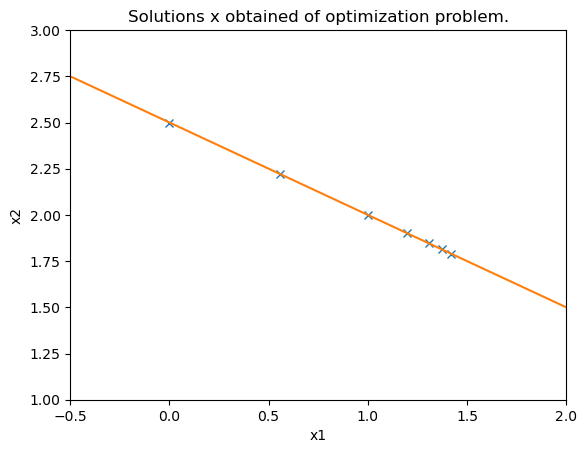

In [54]:
plt.plot(x1,x2,'x',label = 'solution x')
plt.plot(np.array([-0.5,5]),np.array([2.75,0]), label = 'constraint equation of x')
plt.axis([-0.5,2,1,3])
plt.title('Solutions x obtained of optimization problem.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

d) use the Moore-Penrose generalised inverse
$$A^\dagger:=A^\intercal(AA^\intercal)^{-1}$$

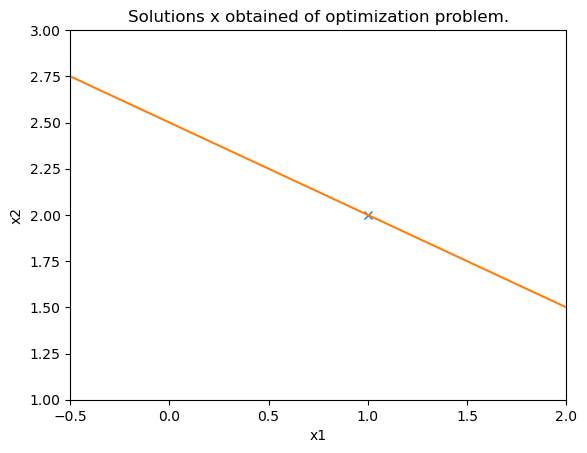

In [58]:
A = np.matrix([1,2])
b = 5
A_con = A.T*((A*A.T)**(-1))
x_MP = A_con * b
plt.plot(x_MP[0],x_MP[1],'x',label = 'solution x')
plt.plot(np.array([-0.5,5]),np.array([2.75,0]), label = 'constraint equation of x')
plt.axis([-0.5,2,1,3])
plt.title('Solutions x obtained of optimization problem.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()